<a href="https://colab.research.google.com/github/kitkate8/BioPhysHW/blob/main/Class%20notes/Topic_2_randomwalkers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To start, please make your own copy of this file by clicking File -> Save as in Drive from the menu bar above

# Random walkers

A random walk is a mathematical object, as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers. An elementary example of a random walk is the random walk on the integer number line, which starts at 0 and at each step moves +1 or -1 with equal probability.

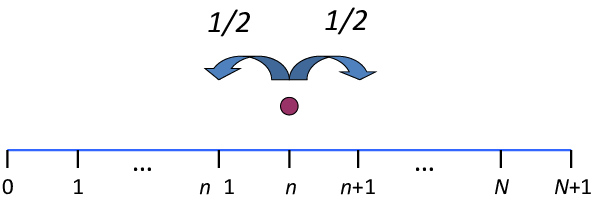

Other examples include the path traced by a molecule as it travels in a liquid or a gas, the search path of a foraging animal, the price of a fluctuating stock and the financial status of a gambler can all be approximated by random walk models, even though they may not be truly random in reality.

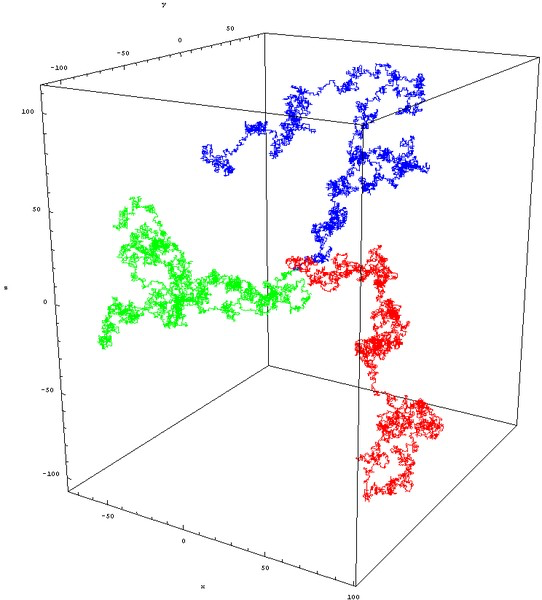


As illustrated by those examples, random walks have applications to many scientific fields including ecology, psychology, computer science, physics, chemistry, biology as well as economics. Random walks explain the observed behaviors of many processes in these fields and thus serve as a fundamental model for the recorded stochastic activity. As a more mathematical application, the value of pi can be approximated by the usage of random walk in the agent-based modeling environment: https://www.wired.com/2017/03/hey-can-find-pi-random-walk-heres/#:~:text=Here's%20the%20plan%3A%20Run%20the,Here%20the%20slope%20is%200.631.

## Let's jump right into coding and implement a 1D random walker

Write code that plots the path of a 1D random walker that moves randomly but can only move along the x-axis by 1 integer (so either left or right with equal probability) at each time step. The x-axis of your plot should be step number and the y-axis should be x position. Start your random walker at $x=0$ and have him take 50 steps. Please do this from scratch - don't google "how to code a random walker"

Note: there are a lof of ways to generate random numbers or choices. Look into this list to decide how you want to implement your idea: https://www.geeksforgeeks.org/python-random-module/

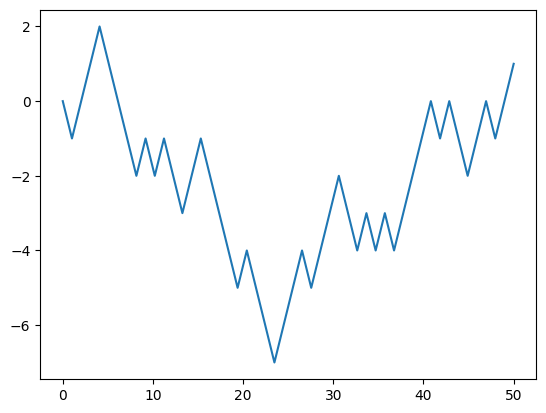

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt

steps = 50
steps_list = np.linspace(0, steps)
xpos = 0
pos = [0]
for i in range(steps - 1):
  x = random.randint(0,1)
  if x == 0:
    xpos = pos[i] + 1
    pos.append(xpos)
  else:
    xpos = pos[i] - 1
    pos.append(xpos)
plt.plot(steps_list, pos)



### Where does your random walker end up? Does this change if you run your code again? How could we explore this random walker model a bit to understand it more?

Write your answer here

### Write code that plots a histogram of the end point of 1000 random walks with 100 steps in each random walk.

(array([2.000e+00, 7.300e+01, 4.550e+02, 1.599e+03, 2.085e+03, 3.071e+03,
        1.928e+03, 6.610e+02, 1.130e+02, 1.300e+01]),
 array([-39. , -31.4, -23.8, -16.2,  -8.6,  -1. ,   6.6,  14.2,  21.8,
         29.4,  37. ]),
 <BarContainer object of 10 artists>)

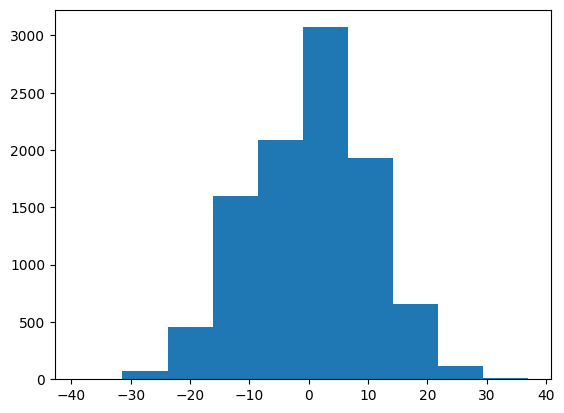

In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt



def rw(steps, ipos):
  pos = [ipos]
  steps_list = np.linspace(0, steps)
  for i in range(steps - 1):
   x = random.randint(0,1)
   if x == 0:
      xpos = pos[i] + 1
      pos.append(xpos)
   else:
      xpos = pos[i] - 1
      pos.append(xpos)
  return pos[steps - 1]

walks = 10000
final_step = []
for i in range(walks):
  final_step.append(rw(100, 0))

plt.hist(final_step)




## As you increase the number of runs, what does this plot start to resemble? What is the average value of your random walker's final position? Does that make sense?

Plot starts to resemble a gaussian distribution/bell curve, average value is around 0.

## Diffusion

Diffusion is the net movement of anything (for example, atoms, ions, molecules, energy) generally from a region of higher concentration to a region of lower concentration. What happens if we put a drop of dye into a cup and let it sit for a while?


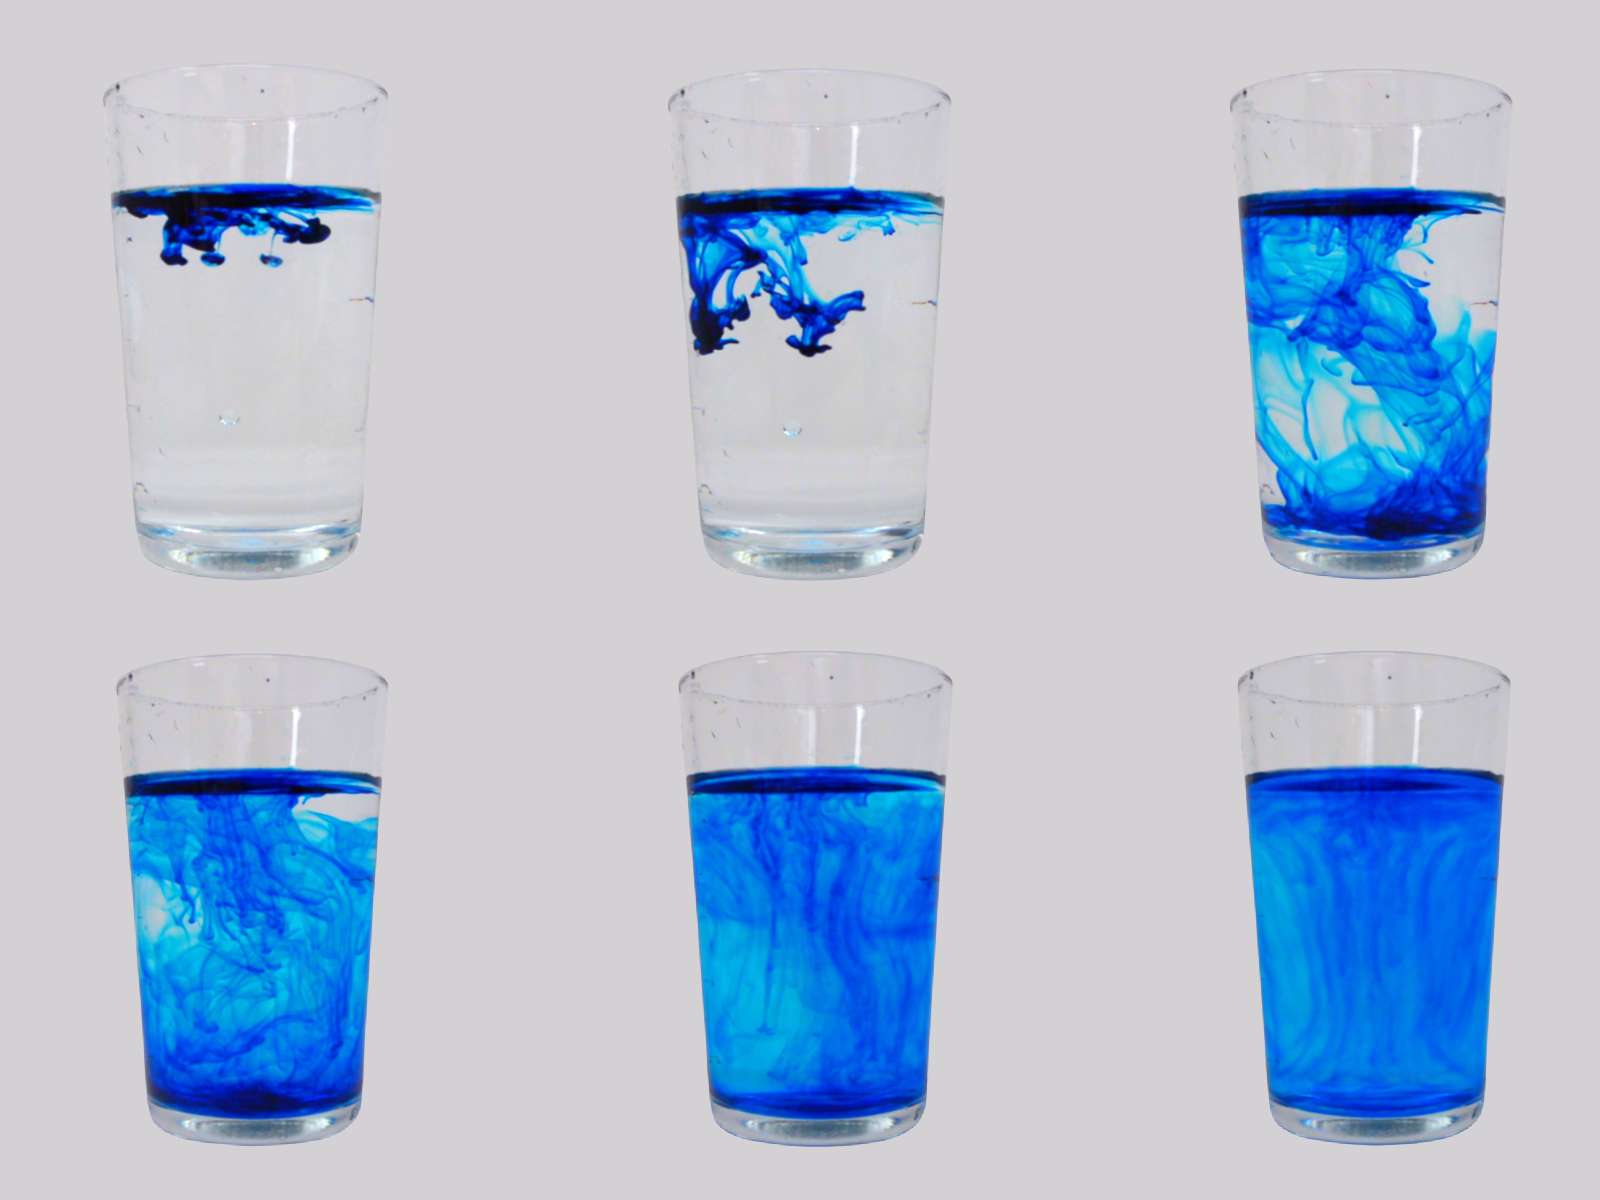


The diffusion equation is:

$\frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2}$,

where $C$ is the concentration of particles and $D$ is some diffusion constant (that tells you how fast the particles move based on what particles you're dealing with and any external parameters such as temperature)

Let's first get an intuition for what the diffusion equation tells us. The equation in words says that the change in the concentration of our (let's say) dye molecule in water as a function of time is proportional to the second derivative of that concentration in space.

Let's make a 1D little graph of our dye concentration in space, say it's all concentrated in one spot in the middle for now.

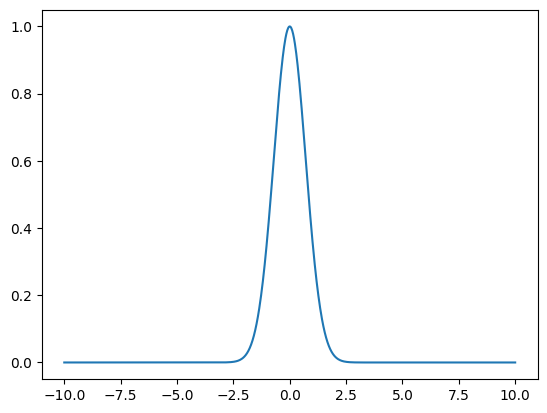

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,1000)
c = np.exp(-x*x)
plt.plot(x,c)
plt.show()

Now we want to see how this concentration will change as a function of time. We know that the change as a function of time, from the diffusion equation, is dependent on a particular time's second derivative.

What does the second derivative physically represent? What is the second derivative at each point in space along this curve? Draw it with arrows and then sketch the graph of the next time point based on your arrows.

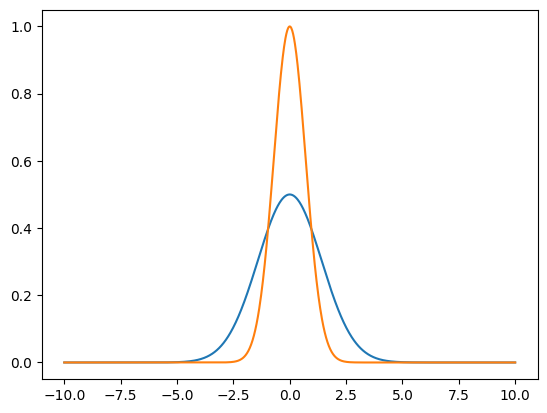

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,1000)
c1 = np.exp(-x*x)
c = 1/2*np.exp(-x*x/4)
plt.plot(x,c)
plt.plot(x,c1)
plt.show()

And now you can imagine you keep going for several time points:

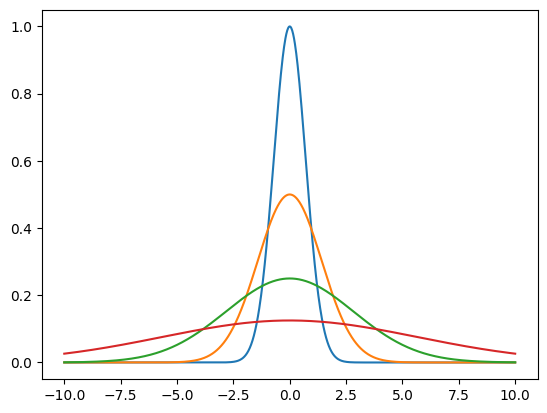

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,1000)
c1 = np.exp(-x*x)
c2 = 1/2*np.exp(-x*x/4)
c3 = 1/4*np.exp(-x*x/16)
c4 = 1/8*np.exp(-x*x/64)

plt.plot(x,c1)
plt.plot(x,c2)
plt.plot(x,c3)
plt.plot(x,c4)
plt.show()

### What do you notice is happening towards the end (the red line)? How does this relate to your understanding of diffusion (or the dye in water series of pictures we saw earlier)?




your answer here

## Diffusion as a random walker

Now that we've refreshed our memory on what diffusion looks like, let's learn about how you can use the random walk model to simulate diffusion!

First, write code that traces the path of 200 random walkers taking 1000 steps all in the same plot

<ipython-input-35-e27dafb372de>:20: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(np.arange(0, 1000, 1), path, label=["walk", i])


Text(0, 0.5, 'position')

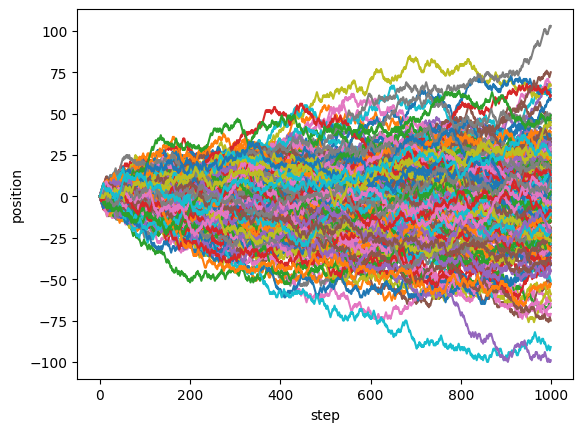

In [35]:
import random
import numpy as np
import matplotlib.pyplot as plt

def rw(steps, ipos):
  pos = [ipos]
  for i in range(steps - 1):
   x = random.randint(0,1)
   if x == 0:
      xpos = pos[i] + 1
      pos.append(xpos)
   else:
      xpos = pos[i] - 1
      pos.append(xpos)
  return pos

walk = []
for i in range(200):
  path = rw(1000, 0)
  plt.plot(np.arange(0, 1000, 1), path, label=["walk", i])
  walk.append(path)
plt.xlabel("step")
plt.ylabel("position")

Now let's plot a histogram of location of each random walker at various time steps (so think of this as a verticle slice through the above graph)

In [ ]:
def rw(steps, ipos):
  pos = [ipos]
  for i in range(steps - 1):
   x = random.randint(0,1)
   if x == 0:
      xpos = pos[i] + 1
      pos.append(xpos)
   else:
      xpos = pos[i] - 1
      pos.append(xpos)
  return pos

step_250 = []
for i in range(200):



## Higher dimensions

In higher dimensions, the set of randomly walked points has interesting geometric properties. In fact, random walks are scale invariant: they look the same on all scales, that is, they exhibits stochastic self-similarity on large scales. On small scales, one can observe “jaggedness” resulting from the grid on which the walk is performed.

### Let's now try to create a random 2D walker!
Write code that shows the path of a 10000-step random walker who can move by 1 step either left, right, up or down.

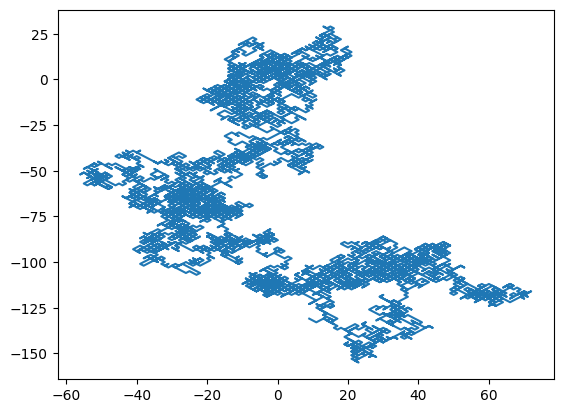

In [37]:
def rw(steps, iposx, iposy):
  posx = [iposx]
  posy = [iposy]
  for i in range(steps - 1):
   x = random.randint(0,1)
   if x == 0:
      xpos = posx[i] + 1
      posx.append(xpos)
   else:
      xpos = posx[i] - 1
      posx.append(xpos)
   y = random.randint(0, 1)
   if y == 0:
    ypos = posy[i] + 1
    posy.append(ypos)
   else:
    ypos = posy[i] - 1
    posy.append(ypos)

  return posx, posy

posx, _ = rw(10000, 0, 0)
_, posy = rw(10000, 0, 0)

plt.plot(posx, posy)

### Does this look like anything to you that you may have seen or heard of before?



Write your answer here

## Biased random walks

Biased random walks are those in which there is some sort of bias in the direction the random walker moves. The quintessential example of this is **diffusion** where small molecules move down a concentration gradient. Let's practice adding a very simple bias to our random walker code in 1D.

